In [1]:
# Importe les modules qui seront utilisé dans le laboratoire.
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import fft
from IPython.display import clear_output
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
from PIL import Image
from nibabel.testing import data_path
import os
import sys
%matplotlib inline
import plotly.express as px

[[118.  112.1 108. ]
 [115.  111.  106. ]
 [113.  109.  108. ]]
[[102.  107.1 123.9]
 [ 97.1 106.1 123.9]
 [ 97.1 102.  130. ]]


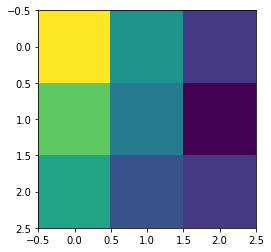

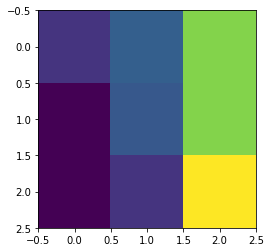

In [2]:
img1 = np.array([[118, 112.1, 108], [115, 111, 106], [113, 109, 108]])
img2 = np.array([[102, 107.1, 123.9], [97.1, 106.1, 123.9], [97.1, 102, 130]])
angle1 = np.deg2rad(3)
angle2 = np.deg2rad(20)
B1 = np.array([[1.124, 1.151, 1.138],[1.147, 1.157, 1.142],[1.166,1.163,1.144]])
print(img1)
print(img2)
plt.imshow(img1, interpolation='nearest')
plt.show()
plt.imshow(img2, interpolation='nearest')
plt.show()




In [3]:
import nibabel as nib
example_filename = ('VFAData.nii.gz')
img1 = nib.load(example_filename)
img1.shape
example_filename = ('B1map.nii.gz')
img2 = nib.load(example_filename)
img2.shape
example_filename = ('133.nii')
img3 = nib.load(example_filename)
img3.shape

(262, 458, 31)

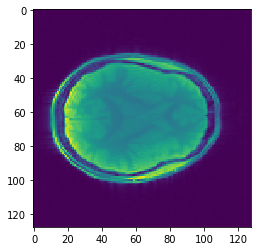

112.0081787109375


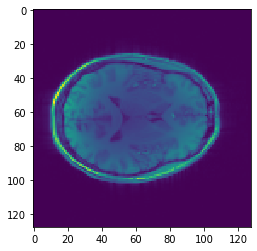

99.41046905517578


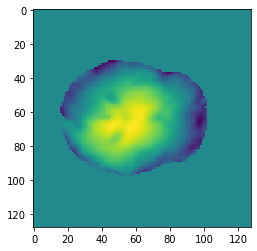

1.0


In [4]:
from PIL import Image 
from numpy import asarray 
data = img1.get_fdata()
data.shape
mapangles = asarray(data) 
data = img2.get_fdata()
data.shape
#ajust1 = np.ones((128,128))
#ajust2 = np.ones((128,128))/100
mapb1 = asarray(data)
#print(numpydata[125][64][0][1])
angle3 = mapangles[:,:,0,0]
angle20 = mapangles[:,:,0,1]
angle1 = np.deg2rad(3)
angle2 = np.deg2rad(20)
plt.imshow(angle3, interpolation='nearest')
plt.show()
print(angle3[60][60])
plt.imshow(angle20, interpolation='nearest')
plt.show()
print(angle20[60][60])
plt.imshow(mapb1, interpolation='nearest')
plt.show()
print(mapb1[10][10])

In [5]:
coordx=80
coordy=80
TF = 15
pente = ((angle20[coordx][coordy]/np.sin(angle2*mapb1[coordx][coordy]))-(angle3[coordx][coordy]/np.sin(angle1*mapb1[coordx][coordy])))/((angle20[coordx][coordy]/np.tan(angle2*mapb1[coordx][coordy]))-(angle3[coordx][coordy]/np.tan(angle1*mapb1[coordx][coordy])))
T1 = -TF/(np.log(pente))
print(T1)

1731.5173357453648


In [6]:
T1graph = np.zeros([128,128])
for i in range(0,127):
    for j in range(0,127):
        coordx=i
        coordy=j
        TF = 15
        #if (mapb1[coordx][coordy] > 1) and (angle20[coordx][coordy] > 10) and (angle3[coordx][coordy] > 10):
        pente = ((angle20[coordx][coordy]/np.sin(angle2*mapb1[coordx][coordy]))-(angle3[coordx][coordy]/np.sin(angle1*mapb1[coordx][coordy])))/((angle20[coordx][coordy]/np.tan(angle2*mapb1[coordx][coordy]))-(angle3[coordx][coordy]/np.tan(angle1*mapb1[coordx][coordy])))
        if (pente > 0):
            T1 = -TF/(np.log(pente))
            if (T1 < 3000) and (T1 >= 0):
                T1graph[coordx][coordy] = T1

C:\Users\Utilisateur\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


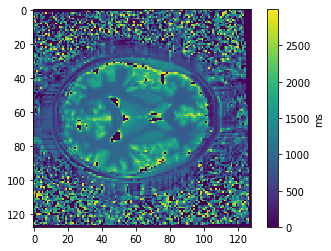

1305.2964725798302


In [7]:
plt.imshow(T1graph, interpolation='nearest')
cb = plt.colorbar()
cb.set_label('ms')
plt.show()
print(T1graph[60][60])


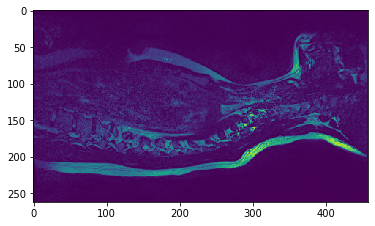

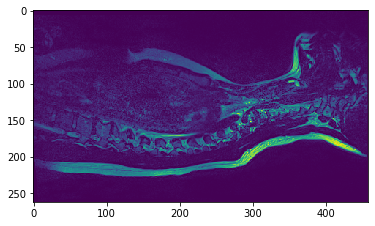

In [8]:
data = img3.get_fdata()
data.shape
mapGab = asarray(data) 
mapGab1 = mapGab[:,:,1]
plt.imshow(mapGab1, interpolation='nearest')
plt.show()
#print(mapGab1[60][60])
mapGab2 = mapGab[:,:,2]
plt.imshow(mapGab2, interpolation='nearest')
plt.show()
#print(mapGab1[60][60])

In [9]:
T1graphG = np.zeros([262,458])
for i in range(0,261):
    for j in range(0,458):
        coordx=i
        coordy=j
        TF = 15
        if (mapGab2[coordx][coordy] > 10) and (mapGab1[coordx][coordy] > 10):
            pente = ((mapGab2[coordx][coordy]/np.sin(angle2))-(mapGab1[coordx][coordy]/np.sin(angle1)))/((mapGab2[coordx][coordy]/np.tan(angle2))-(mapGab2[coordx][coordy]/np.tan(angle1)))
            if (pente > 0):
                T1G = -TF/(np.log(pente))
                if (T1G < 500) and (T1G >= 0):
                    T1graphG[coordx][coordy] = T1G

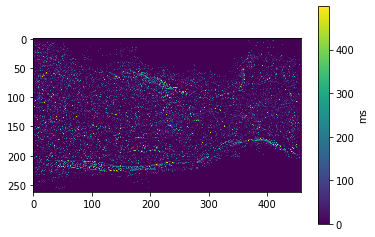

In [10]:
plt.imshow(T1graphG, interpolation='nearest')
cb = plt.colorbar()
cb.set_label('ms')
plt.show()
#print(T1graphG[60][60])


In [13]:
# Generate artificial data = straight line with a=0 and b=1
# plus some noise.
xdata = np.array([0.0,1.0,2.0,3.0,4.0,5.0])
ydata = np.array([0.1,0.9,2.2,2.8,3.9,5.1])
# Initial guess.
x0    = np.array([0.0, 0.0, 0.0])
sigma = np.array([1.0,1.0,1.0,1.0,1.0,1.0])

In [14]:
def func(x, a, b, c):
    return a + b*x + c*x*x

In [15]:
import scipy.optimize as optimization

print(optimization.curve_fit(func, xdata, ydata, x0, sigma))

(array([0.1       , 0.88142857, 0.02142857]), array([[ 0.02753741, -0.0197551 ,  0.0029932 ],
       [-0.0197551 ,  0.02436463, -0.0044898 ],
       [ 0.0029932 , -0.0044898 ,  0.00089796]]))


In [16]:
# The function whose square is to be minimised.
# params ... list of parameters tuned to minimise function.
# Further arguments:
# xdata ... design matrix for a linear model.
# ydata ... observed data.
def func(params, xdata, ydata):
    return (ydata - np.dot(xdata, params))

In [17]:
# Provide data as design matrix: straight line with a=0 and b=1 plus some noise.
xdata = np.transpose(np.array([[1.0,1.0,1.0,1.0,1.0,1.0],
              [0.0,1.0,2.0,3.0,4.0,5.0]]))

In [18]:
#print(optimization.leastsq(func, x0, args=(xdata, ydata)))

ValueError: shapes (6,2) and (3,) not aligned: 2 (dim 1) != 3 (dim 0)

In [19]:
TR=15
T1 = 25
# Generate artificial data = straight line with a=0 and b=1
# plus some noise.
xdata = np.array([1,3,5,10,15,30])
ydata = np.array([0,0,0,0,0,0])
for i in range (0, xdata.size):
    ydata[i] = ((1-np.exp(-TR/T1))/(1-np.cos(np.deg2rad(xdata[i]))*np.exp(-TR/T1)))*np.sin(np.deg2rad(xdata[i]))
# Initial guess.
x0    = np.array([0.0, 0.0, 0.0])
sigma = np.array([1.0,1.0,1.0,1.0,1.0,1.0])

In [20]:
def func(x, T1, b,c):
    return ((1-np.exp(-TR/T1))/(1-np.cos(np.deg2rad(xdata[i]))*np.exp(-TR/T1)))*np.sin(np.deg2rad(xdata[i]))

In [21]:
import scipy.optimize as optimization

print(optimization.curve_fit(func, xdata, ydata, x0, sigma))

(array([0., 0., 0.]), array([[inf, inf, inf],
       [inf, inf, inf],
       [inf, inf, inf]]))


C:\Users\Utilisateur\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning:

divide by zero encountered in double_scalars

C:\Users\Utilisateur\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:795: OptimizeWarning:

Covariance of the parameters could not be estimated



In [22]:
def residual(variables, x, data, eps_data):
    """Model a decaying sine wave and subtract data."""
    amp = variables[0]
    phaseshift = variables[1]
    freq = variables[2]
    decay = variables[3]

    model = amp * np.sin(x*freq + phaseshift) * np.exp(-x*x*decay)

    return (data-model) / eps_data

In [23]:
TR=15
#T1 = 25
# Generate artificial data = straight line with a=0 and b=1
# plus some noise.
xdata = np.array([1,2,3,4,5,6,12,18,22,30])
ydata = np.array([0,0,0,0,0,0,0,0,0,0])
for i in range (0, xdata.size):
    ydata[i] = 10 * np.sin(xdata[i]*3 + 0.2) * np.exp(-xdata[i]*xdata[i]*0.007)

In [24]:
from scipy.optimize import leastsq

eps_data =10
variables = [10.0, 0.2, 3.0, 0.007]
out = leastsq(residual, variables, args=(xdata, ydata, eps_data))
print(out)

(array([7.10151339e+00, 2.47803821e-01, 2.96306968e+00, 5.82409161e-03]), 1)


In [25]:
def noise(image, noise_type, params=None):
    """
    Cette fonction permet d'ajouter du bruit (de type gaussien, sel et poivre ou speckle) à une image.
    L'argument "noise_type" doit prendre l'une des valeurs suivante: "gaussian", "sp" ou "speckle".
    L'argument "params" contient les paramètres du filtre choisi :
       si noise_type == "gaussian" --> params = [moyenne, variance]
       si noise_type == "sp" --> params = [ratio, quantité]
          où ratio est la proportion entre le bruit de type sel et le bruit de type poivre
       si noise_type == "speckle" --> params = factor
          où factor est le facteur de multiplication du bruit
    """
    if noise_type == "gaussian":
        row= image.shape
        if params:
            mean, var = params[0], params[1]
        else:
            mean, var = 0, 0.1
        sigma = var**0.5
        
        gauss = np.random.normal(mean,sigma,(row))
        gauss = gauss.reshape(row)
        noisy = image + gauss
        
    elif noise_type == "sp":
        row, col = image.shape
        if params:
            s_vs_p, amount = params[0], params[1]
        else:
            s_vs_p, amount = 0.5, 0.004
            
        noisy = np.copy(image)
        
        # Salt mode
        num_salt = np.ceil(amount * image.size * s_vs_p)
        coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
        noisy[coords] = 255

        # Pepper mode
        num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
        coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
        noisy[coords] = 0
    
    elif noise_type == "speckle":
        if params:
            factor = params
        else:
            factor = 0.1
        row, col  = image.shape
        gauss = np.random.randn(row, col)
        gauss = gauss.reshape(row, col)        
        noisy = image + factor * image * gauss
    
    else:
        raise('noise_type must either "gaussian", "sp" or "speckle"')
    
    return noisy

In [26]:
TR=15
T1 = 1600
xdata = np.array([1.0,2.0,4.0,7.0,12.0,15.0,20.0,30.0])
ydata = np.zeros(xdata.size)
ydata_gauss = np.zeros(xdata.size)
#bruit = np.array([0.4,-1.0,0.02,0.7,-0.09,0.3,0.2])
for i in range (0, xdata.size):
    ydata[i] = ((1-np.exp(-TR/T1))/(1-np.cos(np.deg2rad(xdata[i]))*np.exp(-TR/T1)))*np.sin(np.deg2rad(xdata[i]))#+bruit[i]/1000
ydata_gauss = noise(ydata, "gaussian", [0,0.00001])
print(ydata_gauss)
SNR = ydata_gauss.mean()/np.std(ydata-ydata_gauss)
print(20*np.log(SNR)/np.log(10))

[0.01366037 0.02650364 0.05328751 0.06712715 0.0655027  0.05434961
 0.04330654 0.03623228]
23.485006916261263


In [27]:
def residual(variables, x, data, eps_data):
    """Model a decaying sine wave and subtract data."""
    T1 = variables[0]

    model = ((1-np.exp(-15/T1))/(1-np.cos(np.deg2rad(x))*np.exp(-15/T1)))*np.sin(np.deg2rad(x))

    return (data-model) / eps_data

In [28]:
eps_data =1
variables = [1000]
out = leastsq(residual, variables, args=(xdata, ydata_gauss, eps_data))
print(out)

(array([1605.51065864]), 1)


In [29]:
#Comparaison méthode linéaire
pente = ((ydata_gauss[4]/np.sin(np.deg2rad(xdata[4])))-(ydata_gauss[0]/np.sin(np.deg2rad(xdata[0]))))/((ydata_gauss[4]/np.tan(np.deg2rad(xdata[4])))-(ydata_gauss[0]/np.tan(np.deg2rad(xdata[0]))))
T1 = -TF/(np.log(pente)) 
print(T1)

1044.3845971875444


In [30]:
from scipy.stats import rice

In [31]:

b = 0.5

mean, var, skew, kurt = rice.stats(b, moments='mvsk')

No handles with labels found to put in legend.


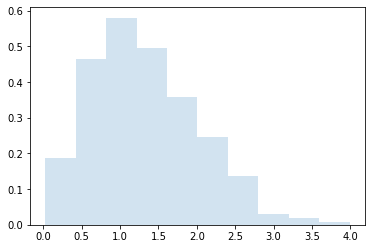

[0.30156386]
1.3304473406107034


In [32]:
fig, ax = plt.subplots(1, 1)
r = rice.rvs(b, size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)

ax.legend(loc='best', frameon=False)

plt.show()
rice1 = rice.rvs(b, size = 1)
print(rice1)
print(mean)

In [33]:
TR=15
T1 = 1600
SNR = 100
xdata = np.array([1.0,2.0,4.0,7.0,12.0,15.0,20.0,30.0])
ydata = np.zeros(xdata.size)
ydata_rice = np.zeros(xdata.size)
bruit = np.array([0.4,-1.0,0.02,0.7,-0.09,0.3,0.2])
for i in range (0, xdata.size):
    ydata[i] = ((1-np.exp(-TR/T1))/(1-np.cos(np.deg2rad(xdata[i]))*np.exp(-TR/T1)))*np.sin(np.deg2rad(xdata[i]))#+bruit[i]/1000
#ydata_gauss = noise(ydata, "gaussian", [0,0.00001])
for i in range (0, xdata.size):
    ydata_rice[i] = ydata[i] + ((rice.rvs(b, size =1)-1)/SNR)
print(ydata_rice)
#SNR = ydata_gauss.mean()/np.std(ydata-ydata_gauss)
#print(20*np.log(SNR)/np.log(10))

[0.01541235 0.04732038 0.05750978 0.06586452 0.05878755 0.04807351
 0.04451698 0.04102778]


In [34]:
eps_data =1
variables = [1000]
out = leastsq(residual, variables, args=(xdata, ydata_rice, eps_data))
print(out)

(array([1677.65469284]), 1)


In [35]:
#Comparaison méthode linéaire
pente = ((ydata_rice[4]/np.sin(np.deg2rad(xdata[4])))-(ydata_rice[0]/np.sin(np.deg2rad(xdata[0]))))/((ydata_rice[4]/np.tan(np.deg2rad(xdata[4])))-(ydata_rice[0]/np.tan(np.deg2rad(xdata[0]))))
T1 = -TF/(np.log(pente)) 
print(T1)

1497.369562857321
